In [1]:
# Paso 0: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

In [4]:
# Paso 1: Cargar y analizar los datos
data = pd.read_csv('Mall_Customers.csv', sep=";")
print("Primeras filas del dataset:")
print(data.head())
print("\nResumen estadístico:")
print(data.describe())
print("\nInformación del dataset:")
print(data.info())

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

Resumen estadístico:
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max 

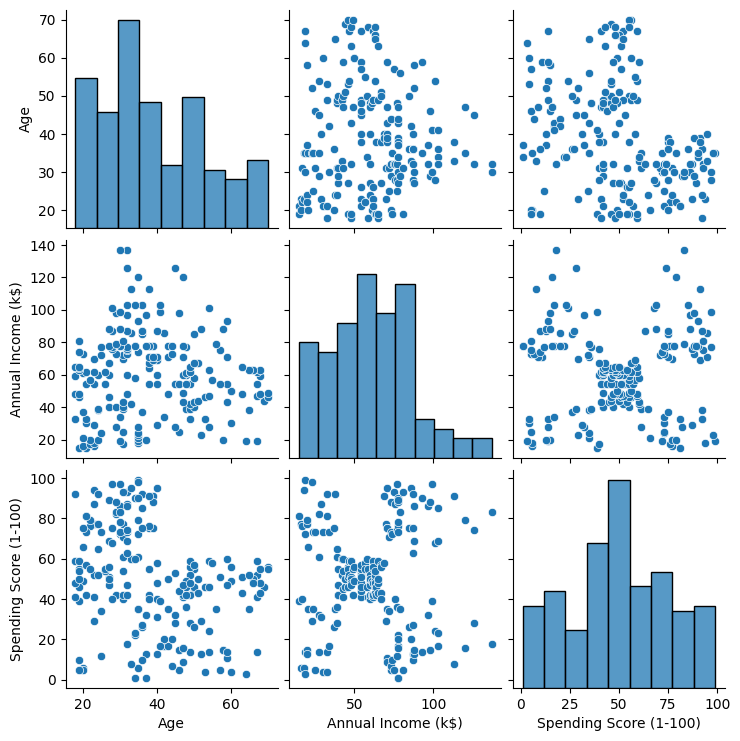

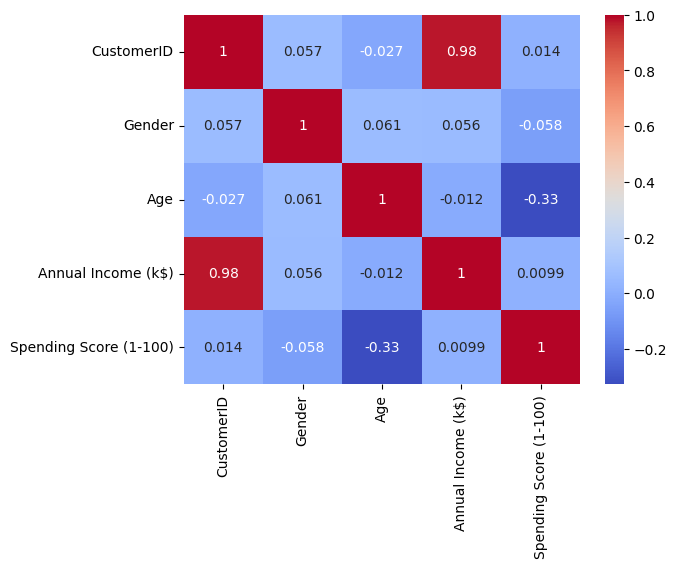

In [5]:
# Gráficos exploratorios
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Paso 2: Preprocesamiento
# Eliminar columnas irrelevantes como "CustomerID"
data_clean = data.drop(['CustomerID'], axis=1)

# Convertir variables categóricas (Gender)
data_clean = pd.get_dummies(data_clean, drop_first=True)

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Paso 3: Selección de características
# (Usamos todas las variables relevantes para clustering jerárquico)
features = data_scaled


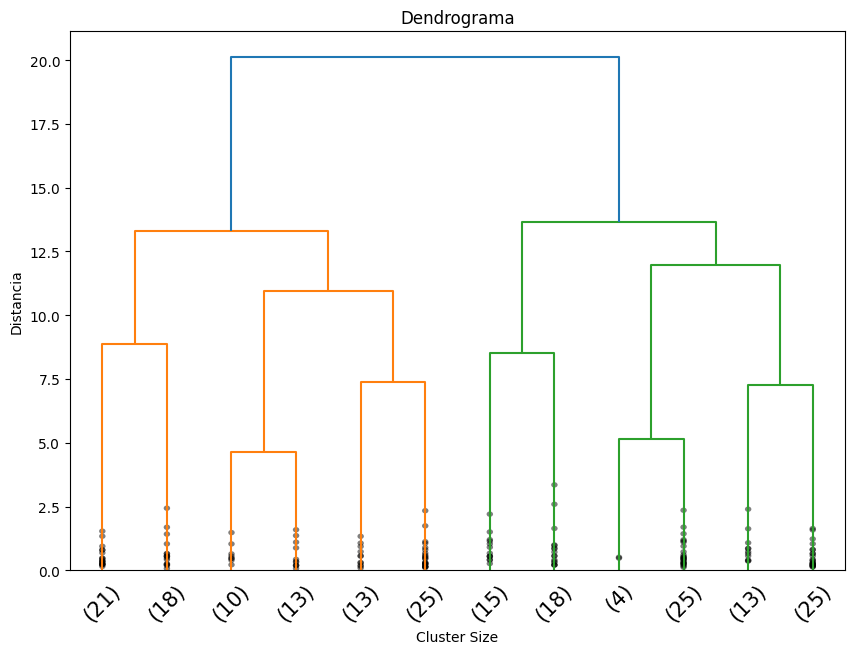

Coeficiente de Silhouette: 0.28699413201651747
Índice de Calinski-Harabasz: 64.46870730105833


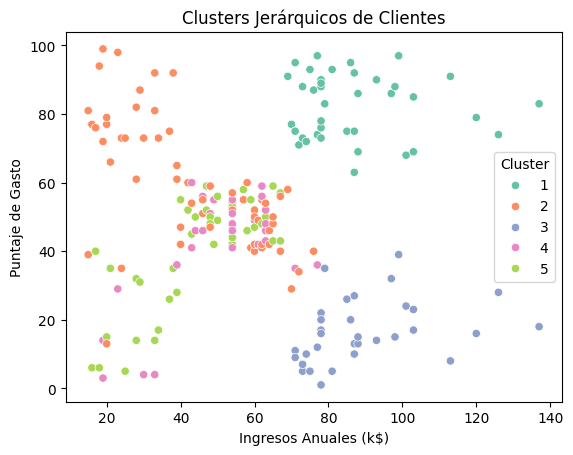


Promedios por cluster:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
1        0.461538  32.692308           86.538462               82.128205
2        0.377049  26.147541           43.770492               58.967213
3        0.545455  41.454545           89.090909               16.181818
4        1.000000  56.551724           50.034483               41.344828
5        0.000000  49.789474           44.105263               39.657895


In [7]:

# Paso 4: Aplicar clustering jerárquico
linked = linkage(features, method='ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Dendrograma')
plt.xlabel('Cluster Size')
plt.ylabel('Distancia')
plt.show()

# Seleccionar número de clusters (por ejemplo, 5)
optimal_k = 5
labels = fcluster(linked, optimal_k, criterion='maxclust')

# Paso 5: Evaluación del modelo
print("Coeficiente de Silhouette:", silhouette_score(features, labels))
print("Índice de Calinski-Harabasz:", calinski_harabasz_score(features, labels))

# Paso 6: Visualización de resultados
# Añadir etiquetas al dataframe original
data_clean['Cluster'] = labels

# Visualización 2D
sns.scatterplot(x=data_clean['Annual Income (k$)'], y=data_clean['Spending Score (1-100)'], hue=data_clean['Cluster'], palette='Set2')
plt.title('Clusters Jerárquicos de Clientes')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto')
plt.show()

# Paso 7: Interpretación y análisis
# Agrupar por cluster para observar diferencias
print("\nPromedios por cluster:")
print(data_clean.groupby('Cluster').mean())
